<a href="https://colab.research.google.com/github/ale-camer/Data-Analysis/blob/Finance/Gender_Pay_Gap_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set has been taken from glassdoor and focuses on income for various job titles based on gender. As there have been many studies showcasing that women are paid less than men for the same job titles, this data set will be helpful in identifying the depth of the gender-based pay gap.

##Libraries and Data

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv("Glassdoor Gender Pay Gap.csv") # https://www.kaggle.com/datasets/nilimajauhari/glassdoor-analyze-gender-pay-gap
data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


##Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


No missing data

In [ ]:
data[data.duplicated()]

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus


No duplicated data

In [ ]:
cat_cols = ['JobTitle','Gender','PerfEval','Education','Dept','Seniority']
quant_cols = ['Age','BasePay','Bonus']
data[quant_cols].describe()

,Age,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000
mean,41.393000,94472.653000,6467.161000
std,14.294856,25337.493272,2004.377365
min,18.000000,34208.000000,1703.000000
25%,29.000000,76850.250000,4849.500000
50%,41.000000,93327.500000,6507.000000
75%,54.250000,111558.000000,8026.000000
max,65.000000,179726.000000,11293.000000


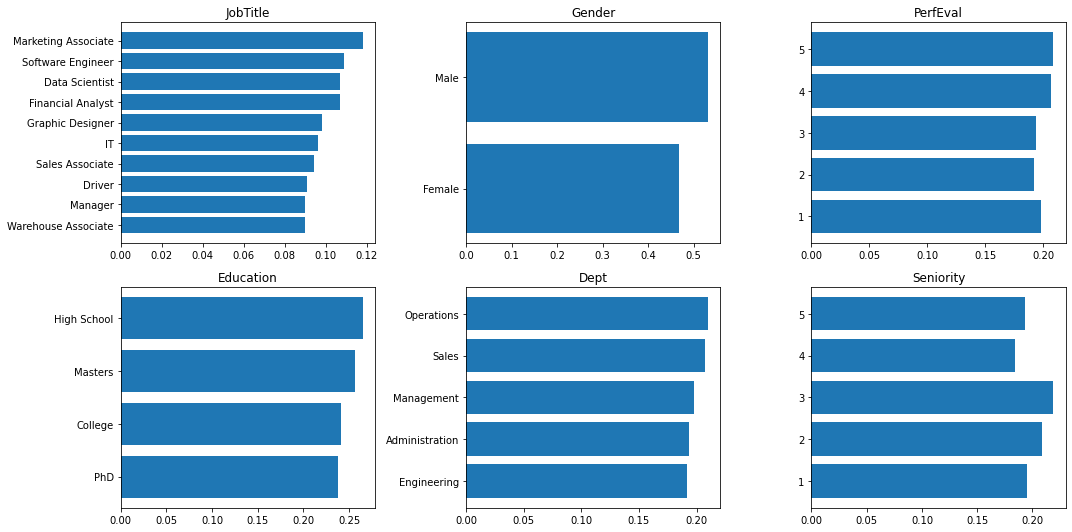

In [ ]:
plt.figure(figsize=(15,7.5))
for col, i in zip(cat_cols,range(len(cat_cols))):
    plt.subplot(2,3,i+1)
    plot_data = data[col].value_counts(normalize=True).sort_values(ascending=True)   
    plt.barh(plot_data.index,plot_data.values)
    plt.title(col)
plt.tight_layout()
plt.show()

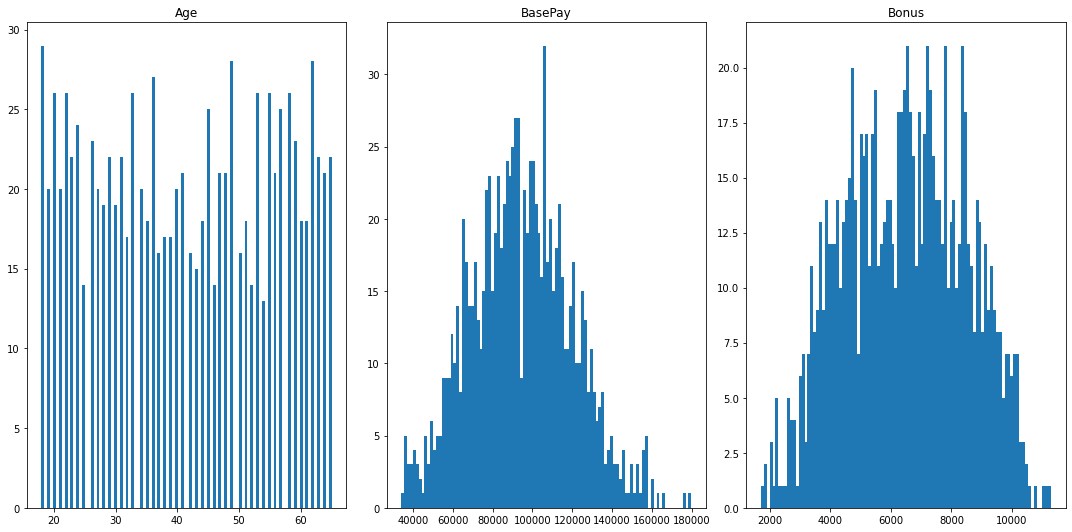

In [ ]:
plt.figure(figsize=(15,7.5))
for col, i in zip(quant_cols,range(len(quant_cols))):
    plt.subplot(1,3,i+1)    
    plt.hist(data[col],bins=100)
    plt.title(col)
plt.tight_layout()
plt.show()

We don't see any inconsistency in the data. No outliers in any variable, two genders, reasonable education level, job titles, departments, performance evaluations, seniority and ages.  

##Data Analysis

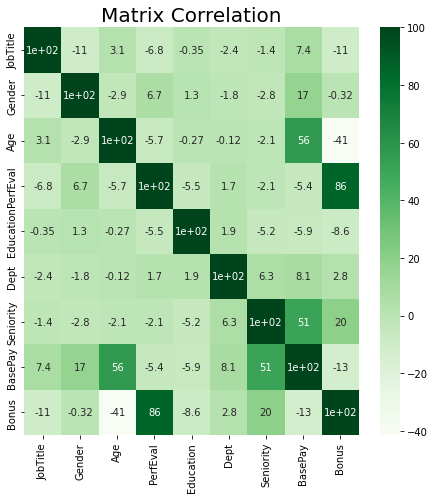

In [ ]:
for col in data.columns:
    if data[col].dtype == 'O': 
        data[col].replace(dict(zip(data[col].unique(),np.arange(data[col].nunique()))),inplace=True) # discretizing categorical variables
corr_data = data.corr() # correlation matrix

plt.figure(figsize=(7.5,7.5))
sns.heatmap(round(corr_data*100,2),annot=True,cmap='Greens')
plt.title('Matrix Correlation',fontsize=20)
plt.show()

Here we can see very few strong relationships among variables. None of them incliude the Gender variable.
We can see positive strong relations between Base Pay and Age, Base Pay and Seniority, and the strongest by far is Bonus and Performance Evaluation. On the other hand, we can see a strong negative relation between Bonus and Age. 

In [ ]:
print(f"Maximum mean correlation: {round(corr_data.describe().loc['mean'].max()*100,2)}%")

Maximum mean correlation: 23.93%


In order to set what a strong relation between two variables is we can take the maximum mean correlation among all variables. By this we mean that from the correlation matrix we calculate the mean correlation of each variable we all the rests and from there we take the maximum value.

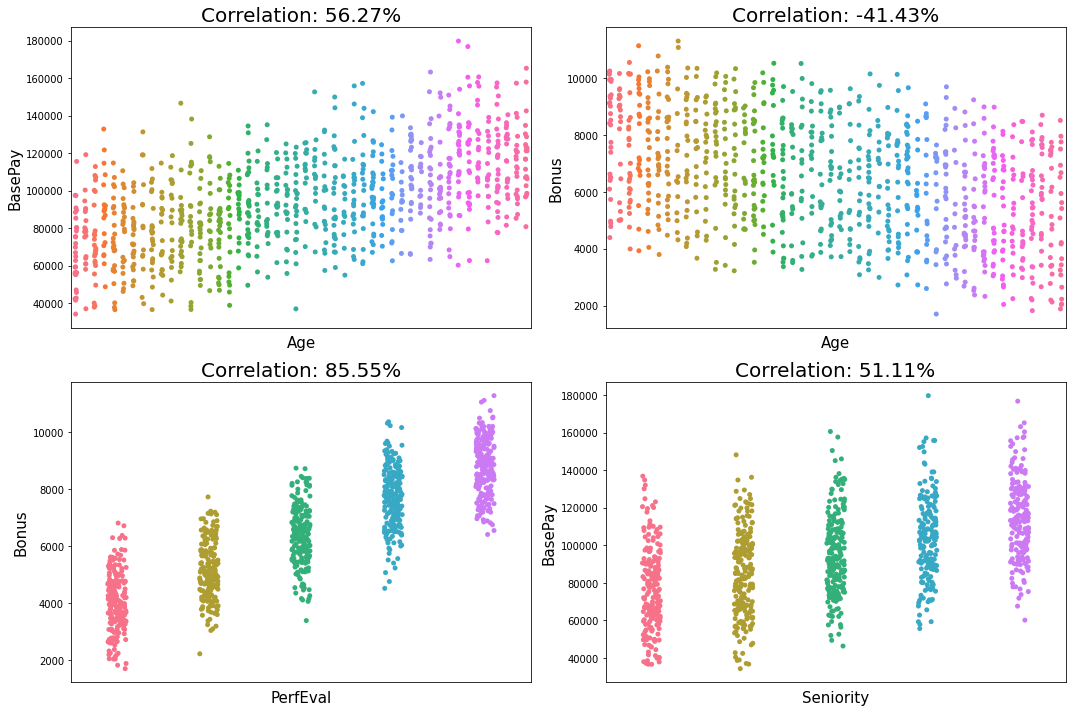

In [ ]:
corrs = []
for col in corr_data.columns:
    for row in corr_data.index:
        if (abs(corr_data.loc[row,col]) >= corr_data.describe().loc['mean',:].max()) and (abs(corr_data.loc[row,col]) != 1):
            corrs.append((row,col,corr_data.loc[row,col]))
        else: pass
corrs = pd.DataFrame(corrs,columns=['var1','var2','value'])    
corrs.drop_duplicates(subset=['value'],inplace=True)

plt.figure(figsize=(15,10))
for var1, var2, i in zip(corrs['var1'],corrs['var2'],range(corrs.shape[0])):
    plt.subplot(2,2,i+1)    
    sns.stripplot(y=var1,x=var2,data=data,palette='husl')
    plt.xticks(ticks=[])
    plt.title(f"Correlation: {round(corr_data.loc[var1,var2]*100,2)}%",fontsize=20)
    plt.ylabel(var1,fontsize=15)
    plt.xlabel(var2,fontsize=15)
plt.tight_layout()
plt.show()

From this dataset we can conclude that peoples base pay increase with age and seniority and that their bonuses increase with a better performance which tends to decrease when people age.